In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

print(pd.__version__)

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')

# Convert dataset to pandas DataFrame
df = dataset['train'].to_pandas()

# Data Clean Up
# Change string to datetime ('job_posted_date' column)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert 'job_skills' string list to a python list
import ast
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)


2.2.3


In [2]:
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States')
    ].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

len(df_DA_US)

4350

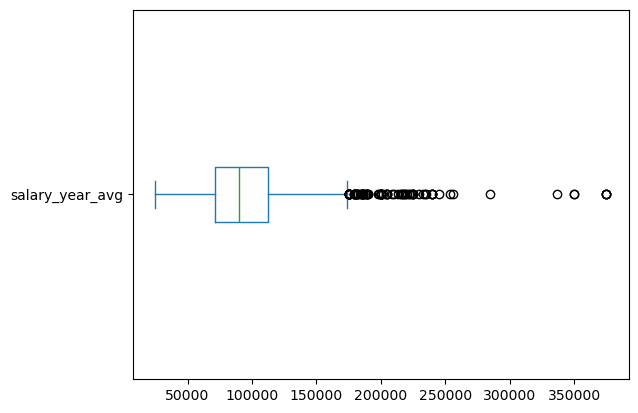

In [3]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
plt.show()

In [4]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[
    (df['job_title_short'].isin(job_titles)) &
    (df['job_country'] == 'United States')
    ].copy()

In [5]:
df_US.dropna(subset=['salary_year_avg'], inplace=True)

In [6]:
len(df_US)
df_US['job_title_short'].value_counts()

job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64

In [7]:
job_list = [df_US[df_US['job_title_short'] == job]['salary_year_avg'] for job in job_titles]

In [8]:
job_list[2].head()

100     228222.0
116     114000.0
257     103128.0
450     157500.0
1257     70700.0
Name: salary_year_avg, dtype: float64

/var/folders/pm/tv1hfy992j7c66s1rw0vxmqc0000gn/T/ipykernel_44756/1243563087.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


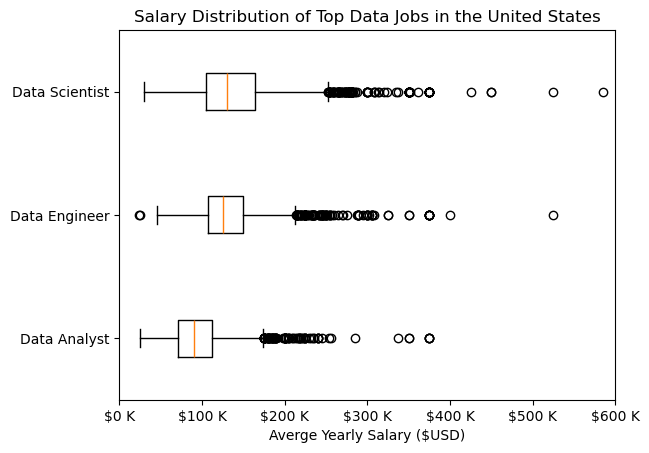

In [13]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution of Top Data Jobs in the United States')
plt.xlabel('Averge Yearly Salary ($USD)')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)} K' ))
plt.xlim(0, 600000)
plt.show()